In [6]:
import nltk
import numpy as np
import random
import string
import bs4 as bs #beautiful soap is a function to clean
import urllib.request
import re #regular expression
import langdetect

In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

In [8]:
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [9]:
ratings=pd.read_csv(r"C:\Users\anant\Documents\MLDataSets\RestaurantRatings\restaurantrawdata.csv")

In [10]:
ratings.head()

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [11]:
ratings.isnull().sum()

Unnamed: 0               0
Name                     0
City                     0
Cuisine Style        31351
Ranking               9651
Rating                9630
Price Range          47855
Number of Reviews    17344
Reviews               9616
URL_TA                   0
ID_TA                    0
dtype: int64

In [ ]:
sns.violinplot

In [9]:
ratings1=ratings.drop(["Unnamed: 0","City","URL_TA","ID_TA","Cuisine Style","Price Range","Number of Reviews"],axis=1)

In [10]:
ratings1.head()

,Name,Ranking,Rating,Reviews
0,Martine of Martine's Table,1.0,5.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,2.0,4.5,"[['Great food and staff', 'just perfect'], ['0..."
2,La Rive,3.0,4.5,"[['Satisfaction', 'Delicious old school restau..."
3,Vinkeles,4.0,5.0,"[['True five star dinner', 'A superb evening o..."
4,Librije's Zusje Amsterdam,5.0,4.5,"[['Best meal.... EVER', 'super food experience..."


In [11]:
ratings1.isnull().sum()

Name          0
Ranking    9651
Rating     9630
Reviews    9616
dtype: int64

In [12]:
ratings1.drop(["Ranking"],axis=1,inplace=True)

In [13]:
ratings1.Rating= ratings1.Rating.replace("NEW", np.nan)
ratings1.dropna(how ='any', inplace = True)

In [14]:
ratings1.isnull().sum()

Name       0
Rating     0
Reviews    0
dtype: int64

In [15]:
ratings1.head()

,Name,Rating,Reviews
0,Martine of Martine's Table,5.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,4.5,"[['Great food and staff', 'just perfect'], ['0..."
2,La Rive,4.5,"[['Satisfaction', 'Delicious old school restau..."
3,Vinkeles,5.0,"[['True five star dinner', 'A superb evening o..."
4,Librije's Zusje Amsterdam,4.5,"[['Best meal.... EVER', 'super food experience..."


#Language Detect

In [35]:
txt = "Ik ben een indiaan"
print(txt, " --> ", langdetect.detect(txt))


Ik ben een indiaan  -->  nl


In [39]:
langdetect.detect.__doc__

Text(0.5, 1.0, 'Rating')

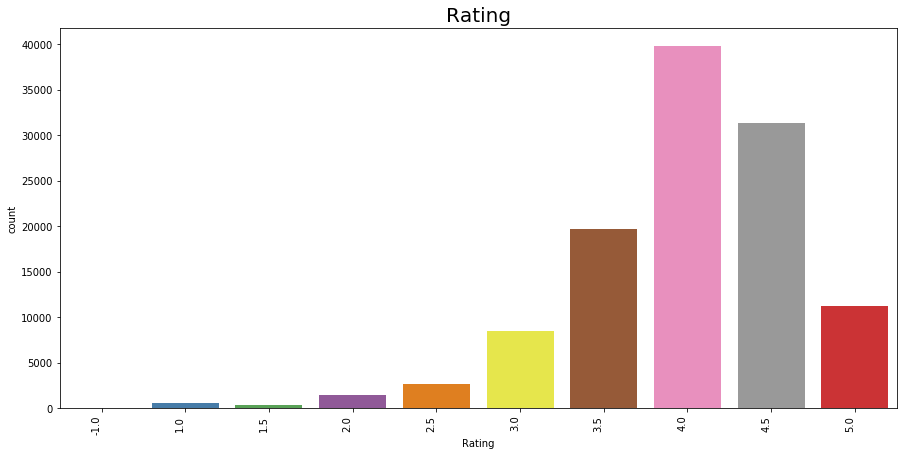

In [14]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="Rating",data=ratings1, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Rating',size = 20)

In [15]:
ratings1.drop(["Name"],axis=1,inplace=True)

In [16]:
ratings1.head()

,Rating,Reviews
0,5.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,4.5,"[['Great food and staff', 'just perfect'], ['0..."
2,4.5,"[['Satisfaction', 'Delicious old school restau..."
3,5.0,"[['True five star dinner', 'A superb evening o..."
4,4.5,"[['Best meal.... EVER', 'super food experience..."


In [17]:
ratings1["newrating"]=np.where(ratings1["Rating"]<3,0,1)

In [18]:
ratings1.drop(["Rating"],axis=1,inplace=True)

In [19]:
ratings1.head()

,Reviews,newrating
0,"[['Just like home', 'A Warm Welcome to Wintry ...",1
1,"[['Great food and staff', 'just perfect'], ['0...",1
2,"[['Satisfaction', 'Delicious old school restau...",1
3,"[['True five star dinner', 'A superb evening o...",1
4,"[['Best meal.... EVER', 'super food experience...",1


In [20]:
ratings1["newrating"].value_counts()

1    110691
0      5201
Name: newrating, dtype: int64

<b>#Text Preprocessing</b>

In [21]:
import re
from bs4 import BeautifulSoup


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [22]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [23]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(ratings1['Reviews'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|████████████████████████████████████████████████████████████████████████| 115892/115892 [01:03<00:00, 1824.32it/s]


In [24]:
preprocessed_reviews[2000]

'early morning saviour five times'

<b><h1>BAG OF WORDS</h1></b>

In [25]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaaaaa', 'aaaaaaaaamazing', 'aaaaamazing', 'aaaamazing', 'aaaargh', 'aalto', 'aamiainen', 'aanrader', 'aardige']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (115892, 23585)
the number of unique words  23585


In [26]:
final_counts

<115892x23585 sparse matrix of type '<class 'numpy.int64'>'
	with 524392 stored elements in Compressed Sparse Row format>

<b><h1>Bi-Grams and n-Grams.</h1></b>

In [27]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10)
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (115892, 7831)
the number of unique words including both unigrams and bigrams  7831


<b><h1>TF-IDF</h1></b>

In [28]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['able', 'absolute', 'absolute gem', 'absolute must', 'absolutely', 'absolutely amazing', 'absolutely delicious', 'absolutely disgusting', 'absolutely fabulous', 'absolutely fantastic']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (115892, 7831)
the number of unique words including both unigrams and bigrams  7831


In [29]:
print(final_tf_idf)

  (0, 7567)	0.4373624530864134
  (0, 4048)	0.43679227390701575
  (0, 178)	0.3898576085585064
  (0, 7604)	0.3705209016121007
  (0, 7560)	0.3508734093414831
  (0, 3679)	0.3275874265573783
  (0, 4044)	0.3134106398665652
  (1, 6744)	0.6438575214688421
  (1, 2700)	0.5163146882598632
  (1, 3381)	0.27682925740866865
  (1, 5297)	0.31898390770773705
  (1, 6727)	0.29781438829356
  (1, 2481)	0.15386704566304124
  (1, 3300)	0.16766927561556166
  (2, 5103)	0.46937507692879116
  (2, 6060)	0.21125520971331987
  (2, 6304)	0.45605665509423393
  (2, 5100)	0.3586034923530601
  (2, 1586)	0.2404496519551404
  (2, 6279)	0.5836592336442322
  (3, 2411)	0.34803486374657633
  (3, 2451)	0.4375941808629247
  (3, 1710)	0.26912603300974774
  (3, 2410)	0.27811905293124456
  (3, 1991)	0.2500042981739103
  :	:
  (115882, 1903)	0.39513476281629534
  (115882, 1078)	0.34326577329907326
  (115882, 6566)	0.28317700961693826
  (115882, 4117)	0.2538025604840124
  (115882, 6879)	0.30586371124
  (115882, 5441)	0.17211320791644

<b><h1>Applying Naiv Byers Alogorithem on TF-IDF vector </h1></b>

In [30]:
data_features=final_tf_idf.toarray()

In [31]:
data_features = pd.DataFrame(data_features)
data_features.shape

(115892, 7831)

In [32]:
data_features

,0,1,2,3,4,5,6,7,8,9,...,7821,7822,7823,7824,7825,7826,7827,7828,7829,7830
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data_features['sentiment']=ratings1["newrating"]
data_features

,0,1,2,3,4,5,6,7,8,9,...,7822,7823,7824,7825,7826,7827,7828,7829,7830,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
115888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
115889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
115890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
data_features=data_features.dropna()

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_features, test_size = 0.2,random_state=0)


In [36]:
train.x = train.head(1000).drop(["sentiment"],axis=1)
train.y = train.head(1000)['sentiment']

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [37]:
test.x = test.head(1000).drop(["sentiment"],axis=1)
test.y = test.head(1000)['sentiment']

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [39]:
gnb = GaussianNB()
y_pred = gnb.fit(train.x, train.y).predict(test.x)
confusion_matrix(test.y, y_pred)

array([[ 17,  44],
       [232, 707]], dtype=int64)

In [40]:
accuracy_nb = metrics.accuracy_score(test.y, y_pred)
accuracy_nb

0.724

In [41]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())

In [42]:
list_of_sentance[1000]

['great', 'cozy', 'place', 'delicious', 'generous']

In [43]:
from gensim.models import Word2Vec

In [44]:
is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

[('excellent', 0.86313396692276), ('fab', 0.8398777842521667), ('awesome', 0.8351494073867798), ('brilliant', 0.8341111540794373), ('fantastic', 0.8105465173721313), ('good', 0.8078821897506714), ('lovely', 0.7963447570800781), ('nice', 0.7872859239578247), ('superb', 0.7846801280975342), ('terrific', 0.7623642683029175)]
[('worse', 0.8403912782669067), ('eaten', 0.7632027268409729), ('horrible', 0.7392668128013611), ('tasted', 0.7256589531898499), ('slowest', 0.7245321273803711), ('disgusting', 0.6976439952850342), ('best', 0.6877253651618958), ('terrible', 0.6726441383361816), ('smallest', 0.6622772216796875), ('favourites', 0.6528182625770569)]


In [45]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  5027
sample words  ['like', 'home', 'warm', 'welcome', 'amsterdam', 'great', 'food', 'staff', 'perfect', 'satisfaction', 'delicious', 'old', 'school', 'restaurant', 'true', 'five', 'star', 'dinner', 'superb', 'evening', 'fine', 'dining', 'best', 'meal', 'ever', 'isuper', 'experience', 'treat', 'wow', 'birthday', 'family', 'one', 'meals', 'delight', 'service', 'superior', 'exciting', 'setting', 'around', 'excellent', 'herring', 'lovely', 'rustic', 'fish', 'shop', 'simply', 'amazing', 'burgers', 'hidden', 'gem']


<b><h1>Converting text into vectors using wAvg W2V, TFIDF-W2V</h1></b>

In [46]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 115892/115892 [00:26<00:00, 4350.31it/s]


115892
50


In [47]:
sent_vectors[0]

array([-0.49077635,  0.84145642, -0.40996147, -0.41553642,  0.31504727,
        0.37489981,  0.38082016,  0.40396016, -0.16377822,  0.09130148,
        1.11266528,  0.66957027, -0.25823652,  0.0028001 ,  0.35614034,
       -0.74981509, -0.29003984, -0.62874758,  0.57627843,  0.3446049 ,
       -0.03200435,  0.51145033, -0.17023855, -0.56853795,  0.21742738,
       -0.53293182, -0.26266566,  0.28537247,  0.13177997,  0.30695688,
       -1.01270311,  0.48980156,  0.31965527,  0.11043684,  0.20761512,
        0.19163141, -1.32547192, -0.13255341, -0.27736221,  0.48445992,
        0.4763475 ,  0.18921153, -0.4185276 ,  0.38286587,  0.48197078,
        0.62785447, -0.0632121 , -0.20880338,  0.50636809,  0.62545152])

<b><h1>TFIDF weighted W2v</h1></b>

In [48]:
preprocessed_reviews[0]

'like home warm welcome wintry amsterdam'

In [49]:
model = TfidfVectorizer()
model.fit(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
dictionary

{'aa': 11.561810341941893,
 'aaaaaa': 11.967275450050058,
 'aaaaaaaaamazing': 11.967275450050058,
 'aaaaamazing': 11.967275450050058,
 'aaaamazing': 11.967275450050058,
 'aaaargh': 11.967275450050058,
 'aalto': 11.967275450050058,
 'aamiainen': 11.967275450050058,
 'aanrader': 11.561810341941893,
 'aardige': 11.967275450050058,
 'ab': 10.357837537615957,
 'abandon': 11.561810341941893,
 'abandoned': 11.967275450050058,
 'abaolut': 11.967275450050058,
 'abb': 11.967275450050058,
 'abba': 11.967275450050058,
 'abbas': 11.967275450050058,
 'abbeville': 11.967275450050058,
 'abbey': 11.561810341941893,
 'abbeyhil': 11.967275450050058,
 'abbeys': 11.967275450050058,
 'abbia': 11.967275450050058,
 'abbr': 11.967275450050058,
 'abd': 11.274128269490113,
 'abendessen': 11.967275450050058,
 'aber': 11.274128269490113,
 'abhilash': 11.967275450050058,
 'abholen': 11.967275450050058,
 'ability': 11.967275450050058,
 'abissmal': 11.967275450050058,
 'abit': 11.274128269490113,
 'able': 10.09547327

In [50]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|█████████████████████████████████████████████████████████████████████████| 115892/115892 [04:18<00:00, 448.14it/s]


In [51]:
type(tfidf_sent_vectors)

list

In [52]:
final_df=pd.DataFrame(tfidf_sent_vectors)

In [53]:
#Convert to Pickle
#Pickle for later use
import pickle

final_df.to_pickle("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/final_df.pkl")


In [54]:
#Read in dataframe
import pandas as pd
final_df=pd.read_pickle('C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/final_df.pkl')

In [55]:
final_df.shape

(115892, 50)

In [56]:
y1=[]
y1=ratings1["newrating"]
type(y1)
y1.shape

(115892,)

In [57]:
X_train,X_test, y_train, y_test = train_test_split(final_df, y1, stratify=y1, test_size=0.3)

In [58]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (81124, 50)
Number of data points in test data : (34768, 50)


In [59]:
alpha = [10 ** x for x in range(-5, 2)]

In [60]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(10,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [61]:
from sklearn.linear_model import SGDClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  1e-05 The log loss is: 0.1562494973032077


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  0.0001 The log loss is: 0.155365523114266


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  0.001 The log loss is: 0.15628518827959556


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  0.01 The log loss is: 0.15761401019526014


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  0.1 The log loss is: 0.16029126734317925


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  1 The log loss is: 0.17395346503886752


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  10 The log loss is: 0.17585321186372016


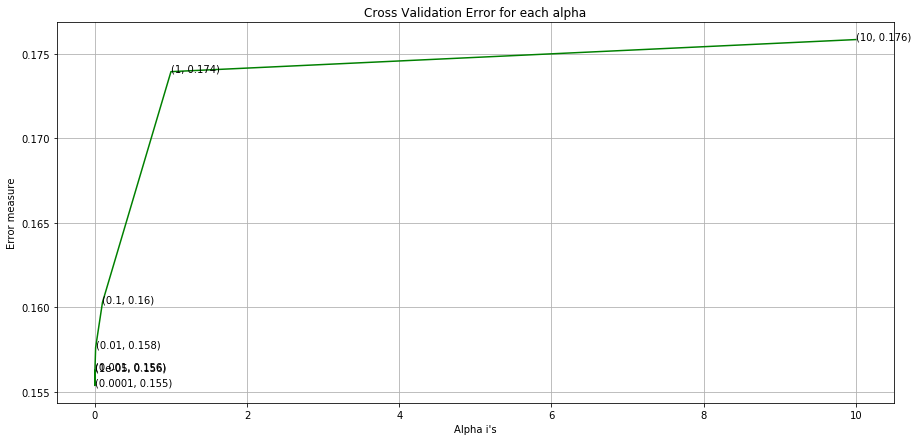

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of best alpha =  0.0001 The train log loss is: 0.15423548934670742
For values of best alpha =  0.0001 The test log loss is: 0.155365523114266
Total number of data points : 34768


In [62]:
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))


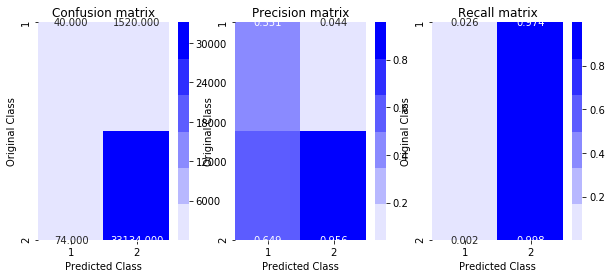

In [63]:
plot_confusion_matrix(y_test, predicted_y)

#Applying LInear SVM Model

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  1e-05 The log loss is: 0.16124517943704791


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  0.0001 The log loss is: 0.1604933113047069


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  0.001 The log loss is: 0.1633658244410501


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  0.01 The log loss is: 0.168680455055343


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  0.1 The log loss is: 0.18312025327855175


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  1 The log loss is: 0.18312025327855175


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of alpha =  10 The log loss is: 0.18312025327855175


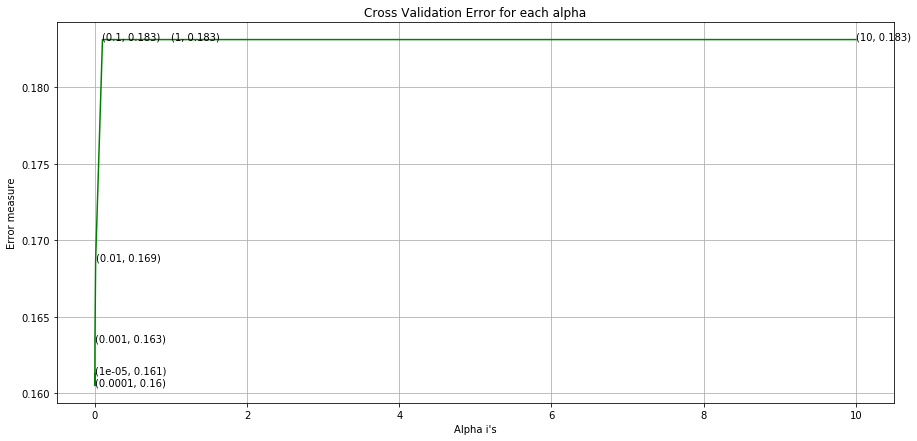

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of best alpha =  0.0001 The train log loss is: 0.15961592766938865
For values of best alpha =  0.0001 The test log loss is: 0.1604933113047069
Total number of data points : 34768


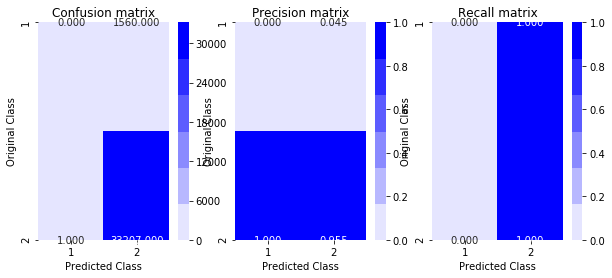

In [64]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#Applying TSNE

In [65]:
# #Applying TSNE on BOW

# import numpy as np
# from sklearn.manifold import TSNE
# from sklearn import datasets
# import pandas as pd
# import matplotlib.pyplot as plt


# x = x
# y = y1

# tsne = TSNE(n_components=2, perplexity=100, learning_rate=200,n_iter=5000)

# X_embedding = tsne.fit_transform(x)
# # if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

# for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
# for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
# colors = {0:'red', 1:'blue', 2:'green'}
# plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
# plt.show()

In [66]:
# for_tsne_df.head(100)

In [67]:
# x2=final_tf_idf[:1000].toarray()
# x2.shape
# y2 = ratings1["newrating"][:1000]
# y3=np.array(y2)


In [68]:
# #Applying TSNE on TF-IDF vector
# import numpy as np
# from sklearn.manifold import TSNE
# from sklearn import datasets
# import pandas as pd
# import matplotlib.pyplot as plt


# x = x2
# y = y3

# tsne = TSNE(n_components=2, perplexity=100, learning_rate=200,n_iter=5000)

# X_embedding = tsne.fit_transform(x)
# # if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

# for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
# for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
# colors = {0:'red', 1:'blue', 2:'green'}
# plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
# plt.show()